## Observations and Insights 

Observations:
1. The drug regime Capomulin and Ramicane are the 2 best performing drugs as it returns the least average tumor volume among the drugs tested.
2. Capomulin and Ramicane have the most number of mice being tested than other drugs and the gender of mice is quite evenly spread out.
3. There is strong correlation between the weight and the tumor volume for mice being tested on Capomulin and the tumor volume increases with the weight.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
drug_test_raw_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
drug_test_raw_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Checking the number of mice.
drug_test_raw_df["Mouse ID"].value_counts()

g989    13
t724    10
j913    10
l725    10
a492    10
        ..
x336     1
l872     1
f932     1
h428     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = drug_test_raw_df.groupby(["Mouse ID","Timepoint"]).count()
duplicate_mice_df = duplicate_mice_df.loc[duplicate_mice_df["Drug Regimen"] > 1]
duplicate_mice_df

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                     2    2           2           2   
         5                     2    2           2           2   
         10                    2    2           2           2   
         15                    2    2           2           2   
         20                    2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                           2                 2  
         5                           2                 2  
         10                          2                 2  
         15                          2                 2  
         20                          2                 2

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = drug_test_raw_df.loc[drug_test_raw_df["Mouse ID"] == 'g989']
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drug_test_cleaned_df = drug_test_raw_df[drug_test_raw_df["Mouse ID"] != 'g989']
drug_test_cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
drug_test_cleaned_df["Mouse ID"].nunique()

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

average_volume = drug_test_cleaned_df.groupby(["Drug Regimen"]).mean()
average_volume = average_volume[["Tumor Volume (mm3)"]]
average_volume = average_volume.rename(columns = {"Tumor Volume (mm3)": "Mean"})
average_volume

median_volume = drug_test_cleaned_df.groupby(["Drug Regimen"]).median()
median_volume = median_volume[["Tumor Volume (mm3)"]]
median_volume = median_volume.rename(columns = {"Tumor Volume (mm3)": "Median"})
median_volume

variance_volume = drug_test_cleaned_df.groupby(["Drug Regimen"]).var()
variance_volume = variance_volume[["Tumor Volume (mm3)"]]
variance_volume = variance_volume.rename(columns = {"Tumor Volume (mm3)": "Variance"})
variance_volume

stddev_volume = drug_test_cleaned_df.groupby(["Drug Regimen"]).std()
stddev_volume = stddev_volume[["Tumor Volume (mm3)"]]
stddev_volume = stddev_volume.rename(columns = {"Tumor Volume (mm3)": "Std Dev"})
stddev_volume

sem_volume = drug_test_cleaned_df.groupby(["Drug Regimen"]).sem()
sem_volume = sem_volume[["Tumor Volume (mm3)"]]
sem_volume = sem_volume.rename(columns = {"Tumor Volume (mm3)": "SEM"})
sem_volume

drug_regimen_summary = pd.merge(average_volume, median_volume, on="Drug Regimen")
drug_regimen_summary = pd.merge(drug_regimen_summary, variance_volume, on="Drug Regimen")
drug_regimen_summary = pd.merge(drug_regimen_summary, stddev_volume, on="Drug Regimen")
drug_regimen_summary = pd.merge(drug_regimen_summary, sem_volume, on="Drug Regimen")
drug_regimen_summary 

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_test_count = drug_test_cleaned_df.groupby(["Drug Regimen"]).count()
drug_test_count = drug_test_count[["Mouse ID"]]
# drug_test_count = drug_test_count.rename(columns = {"Mouse ID": "Total Mice"})
drug_test_count

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


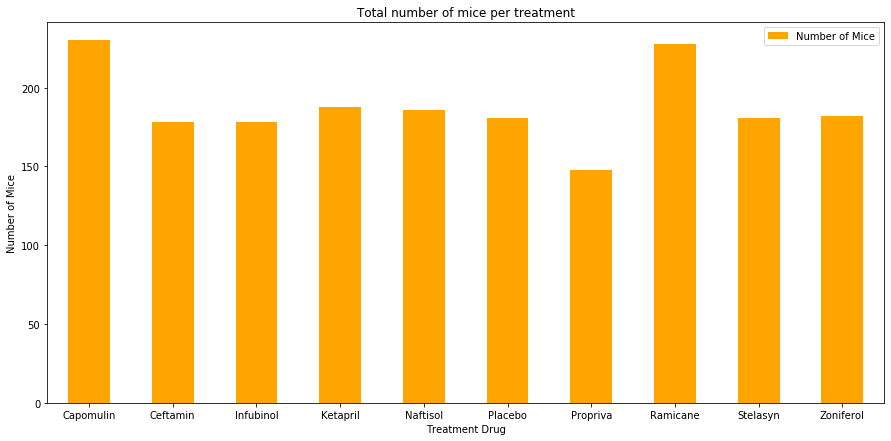

<Figure size 432x288 with 0 Axes>

In [12]:
drug_test_chart = drug_test_count.plot(kind="bar", title="Total number of mice per treatment", color='orange', rot=0, figsize=(15, 7))
drug_test_chart.set_xlabel("Treatment Drug")
drug_test_chart.set_ylabel("Number of Mice")
drug_test_chart.legend(["Number of Mice"])
plt.show()
plt.tight_layout()

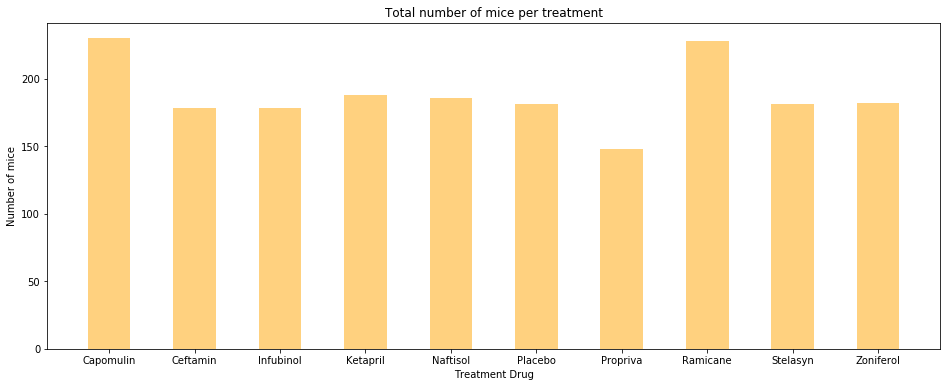

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# drug_test_count.reset_index()
# drug_test_count.columns
plt.figure(figsize=(16,6))
plt.bar(drug_test_count.index,drug_test_count["Mouse ID"], color="orange", alpha=0.5, width=0.5, align="center")

plt.title("Total number of mice per treatment")
plt.ylabel("Number of mice")
plt.xlabel("Treatment Drug")

plt.show()

In [15]:
# Group mouse by gender

drug_test_gender = drug_test_cleaned_df[["Mouse ID", "Sex"]]
drug_test_gender = drug_test_gender.groupby(["Sex"]).count()
drug_test_gender


,Mouse ID
Sex,
Female,922
Male,958


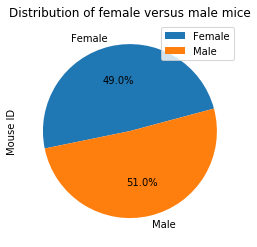

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

drug_test_gender.plot(kind="pie", y="Mouse ID", autopct="%1.1f%%", startangle=15, title="Distribution of female versus male mice")

(-1.1338295836285086,
 1.1109385467104496,
 -1.110347002032572,
 1.1350255777703124)

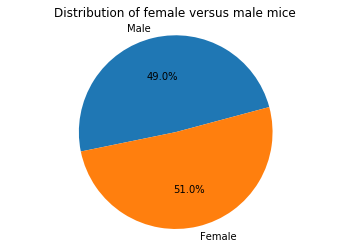

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_labels = ["Male", "Female"]
distribution_list = drug_test_gender["Mouse ID"].tolist()

plt.pie(distribution_list, labels=gender_labels, autopct="%1.1f%%", startangle=15)
plt.title("Distribution of female versus male mice")
plt.axis('equal')

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [18]:
drug_test_cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Get the last timepoint for each mouse
last_tumor_vol_df = drug_test_cleaned_df.groupby(["Mouse ID"]).max()
last_tumor_vol_df = last_tumor_vol_df[["Timepoint", "Drug Regimen"]]
last_tumor_vol_df

,Timepoint,Drug Regimen
Mouse ID,,
a203,45,Infubinol
a251,45,Infubinol
a262,45,Placebo
a275,45,Ceftamin
a366,30,Stelasyn
...,...,...
z435,10,Propriva
z578,45,Ramicane
z581,45,Infubinol


In [20]:
# Make Mouse ID a column instead of index
last_tumor_vol_df["Mouse ID"] = last_tumor_vol_df.index

In [21]:
# Reset index and reorder columns
last_tumor_vol_df = last_tumor_vol_df.reset_index(drop=True)
last_tumor_vol_df = last_tumor_vol_df[["Mouse ID","Drug Regimen","Timepoint"]]
last_tumor_vol_df

,Mouse ID,Drug Regimen,Timepoint
0,a203,Infubinol,45
1,a251,Infubinol,45
2,a262,Placebo,45
3,a275,Ceftamin,45
4,a366,Stelasyn,30
...,...,...,...
243,z435,Propriva,10
244,z578,Ramicane,45
245,z581,Infubinol,45
246,z795,Naftisol,45


In [22]:
# Merge the dataframe to get the tumor volume
last_tumor_summary_df = pd.merge(last_tumor_vol_df, drug_test_cleaned_df, how="left", on=["Mouse ID","Timepoint","Drug Regimen"])
last_tumor_summary_df.head()

,Mouse ID,Drug Regimen,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,45,Female,20,23,67.973419,2
1,a251,Infubinol,45,Female,21,25,65.525743,1
2,a262,Placebo,45,Female,17,29,70.717621,4
3,a275,Ceftamin,45,Female,20,28,62.999356,3
4,a366,Stelasyn,30,Female,16,29,63.440686,1


In [23]:
# Test the data points
drug_test_cleaned_df.loc[drug_test_cleaned_df["Mouse ID"] == 'a203']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
459,a203,Infubinol,Female,20,23,25,56.793208,1
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
462,a203,Infubinol,Female,20,23,40,63.593490,2
463,a203,Infubinol,Female,20,23,45,67.973419,2


In [24]:
# Put treatments into a list for for loop (and later for plot labels)

drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_list = list()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
       
i = 0
    
for drug in drugs_list:
     # Locate the rows which contain mice on each drug and get the tumor volumes
    last_tumor_vol = last_tumor_summary_df.loc[last_tumor_summary_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(last_tumor_vol)
   
   
    # Determine outliers using upper and lower bounds
    
    tumor_quartiles = tumor_vol_list[i].quantile([.25,.5,.75])
    lowerq = tumor_quartiles[0.25]
    upperq = tumor_quartiles[0.75]
    
    # Get the interquartile range and determine upper & lower bounds
    tumor_vol_iqr = upperq-lowerq
    tumor_vol_lowerbound = lowerq - (1.5*tumor_vol_iqr)
    tumor_vol_upperbound = upperq + (1.5*tumor_vol_iqr)
   
    print(drug) 
    print(f"Lower bound: {tumor_vol_lowerbound}")
    print(f"Upper bound: {tumor_vol_upperbound}")
    
    #Determine outliers
    for value in tumor_vol_list[i]:
        if value > tumor_vol_upperbound:
                print(f"outliers: {value}")
        elif value < tumor_vol_lowerbound:
                print(f"outliers: {value}")
        else:
            pass
    
    i = i + 1


Capomulin
Lower bound: 20.70456164999999
Upper bound: 51.83201549
Ramicane
Lower bound: 17.912664470000003
Upper bound: 54.30681135
Infubinol
Lower bound: 36.83290494999999
Upper bound: 82.74144559000001
outliers: 36.321345799999996
Ceftamin
Lower bound: 25.355449580000002
Upper bound: 87.66645829999999


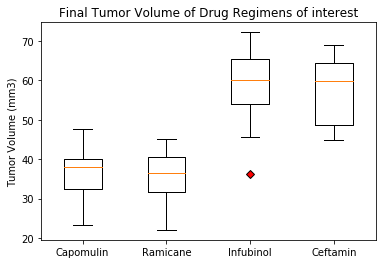

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_diamond = dict(markerfacecolor='r', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Drug Regimens of interest')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_list, labels=drugs_list, flierprops=red_diamond)
plt.show()

## Line and Scatter Plots

In [26]:
capomulin_df = drug_test_cleaned_df.loc[drug_test_cleaned_df["Drug Regimen"] == 'Capomulin']
capomulin_df["Mouse ID"].value_counts()
test_mouse_df = drug_test_cleaned_df.loc[drug_test_cleaned_df["Mouse ID"] == 's710']
test_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
361,s710,Capomulin,Female,1,23,0,45.000000,0
362,s710,Capomulin,Female,1,23,5,43.180977,0
363,s710,Capomulin,Female,1,23,10,43.688026,0
364,s710,Capomulin,Female,1,23,15,41.845235,0
365,s710,Capomulin,Female,1,23,20,42.629963,1
366,s710,Capomulin,Female,1,23,25,43.060409,1
367,s710,Capomulin,Female,1,23,30,43.571703,1
368,s710,Capomulin,Female,1,23,35,44.160519,1
369,s710,Capomulin,Female,1,23,40,40.171920,1
370,s710,Capomulin,Female,1,23,45,40.728578,1


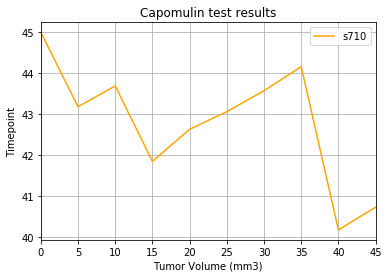

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axis = test_mouse_df["Timepoint"]
y_axis = test_mouse_df["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, color="orange", label="s710")

plt.title("Capomulin test results")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.legend(loc="best")
plt.xlim(0,45)
plt.grid()

plt.show()

In [29]:
average_tumor_vol = capomulin_df.groupby(["Mouse ID"]).mean()
average_tumor_vol = average_tumor_vol[["Tumor Volume (mm3)"]]
average_tumor_vol = average_tumor_vol.rename(columns = {"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
average_tumor_vol["Mouse ID"] = average_tumor_vol.index
average_tumor_vol = average_tumor_vol.reset_index(drop=True)
average_tumor_vol = average_tumor_vol[["Mouse ID","Average Tumor Volume (mm3)"]]
average_tumor_vol.head()

,Mouse ID,Average Tumor Volume (mm3)
0,b128,41.963636
1,b742,40.083699
2,f966,36.505973
3,g288,41.990097
4,g316,44.613344


In [31]:
average_tumor_df = pd.merge(average_tumor_vol, capomulin_df, on=["Mouse ID"], how='right')
average_tumor_df = average_tumor_df.drop_duplicates(subset="Mouse ID")
average_tumor_df.head()

,Mouse ID,Average Tumor Volume (mm3),Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,41.963636,Capomulin,Female,9,22,0,45.0,0
10,b742,40.083699,Capomulin,Male,7,21,0,45.0,0
20,f966,36.505973,Capomulin,Male,16,17,0,45.0,0
25,g288,41.990097,Capomulin,Male,3,19,0,45.0,0
35,g316,44.613344,Capomulin,Female,22,22,0,45.0,0


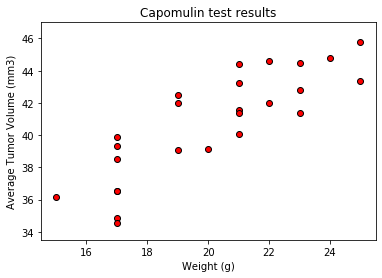

In [32]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(average_tumor_df["Weight (g)"], average_tumor_df["Average Tumor Volume (mm3)"], facecolors="red", edgecolors="black")

plt.title("Capomulin test results")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlim(14.5, 25.5)
plt.ylim(33.5, 47)

plt.show()

## Correlation and Regression

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the correlation coefficient
weight = average_tumor_df["Weight (g)"]
average_tumor = average_tumor_df["Average Tumor Volume (mm3)"]
correlation = st.pearsonr(weight,average_tumor)
print(f"The correlation mouse weight and average tumor volume for the Capomulin regimen {round(correlation[0],2)}")


The correlation mouse weight and average tumor volume for the Capomulin regimen 0.84


In [34]:
#Calculate the linear regresssion 
slope, intercept, rvalue, pvalue, stderr = st.linregress(weight, average_tumor)
print("slope", slope)
print("intercept", intercept)
print("coefficient", rvalue)

Capomulin_regression = weight * slope + intercept
Capomulin_regression.head()

slope 0.9544396890241045
intercept 21.552160532685015
coefficient 0.8419363424694718


0     42.549834
10    41.595394
20    37.777635
25    39.686515
35    42.549834
Name: Weight (g), dtype: float64

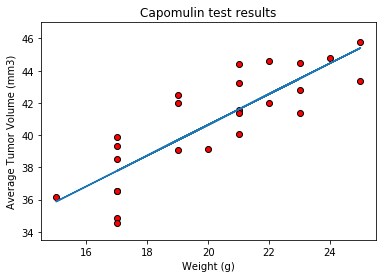

In [35]:
# Plot the linear model on top of scatter plot 
plt.scatter(average_tumor_df["Weight (g)"], average_tumor_df["Average Tumor Volume (mm3)"], facecolors="red", edgecolors="black")
plt.plot(weight, Capomulin_regression)

plt.title("Capomulin test results")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlim(14.5, 25.5)
plt.ylim(33.5, 47)

plt.show()